In [32]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

X.shahpe: (26, 2)


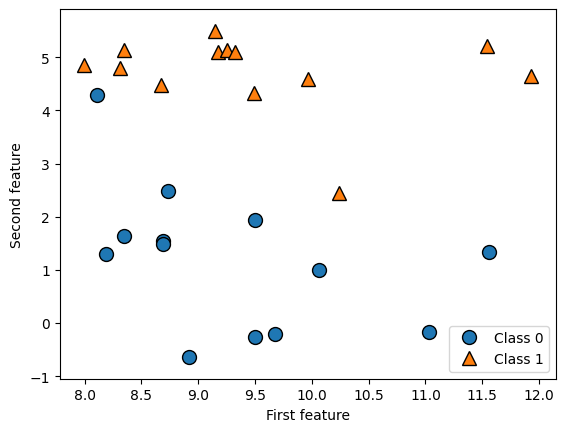

In [33]:
# データセットの生成
X, y = mglearn.datasets.make_forge()

# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shahpe: {}".format(X.shape))

Text(0, 0.5, 'Target')

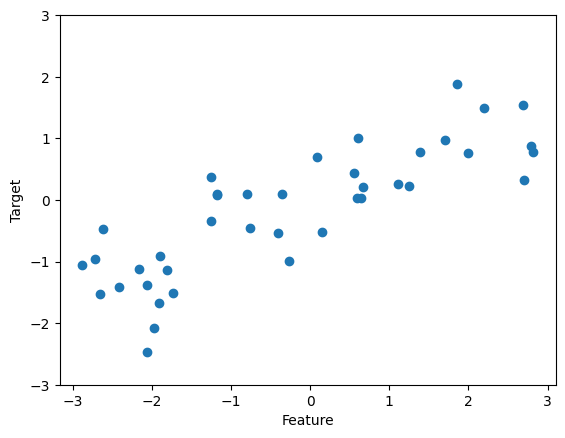

In [34]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [36]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [37]:
print("Sample counts per class: \n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class: 
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [38]:
print("Feature namese: \n{}".format(cancer.feature_names))

Feature namese: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [39]:
# このデータセットは削除されたらしい
# from sklearn.datasets import load_boston
# boston = load_boston
# print("Data shape: {}".format(boston.data.shape))

In [40]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing()

print("Data shape: {}".format(california_housing.data.shape))

Data shape: (20640, 8)


In [41]:
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [42]:
# データセットの説明
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

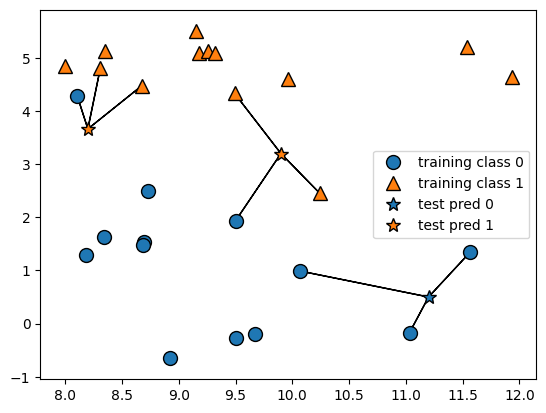

In [43]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [44]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [46]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [48]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))


Test set accuracy: 0.86


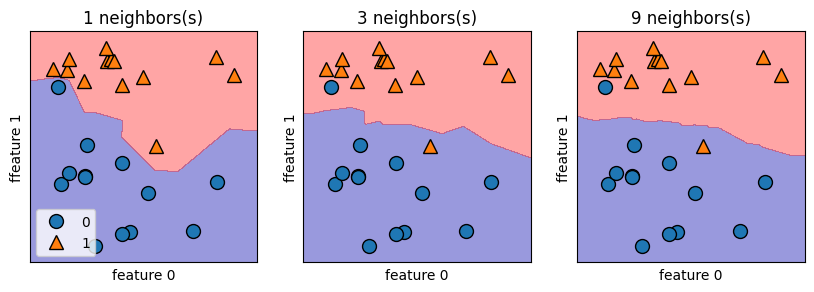

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fitメソッドは自分自身を返すので，1行でインスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("ffeature 1")

axes[0].legend(loc=3)

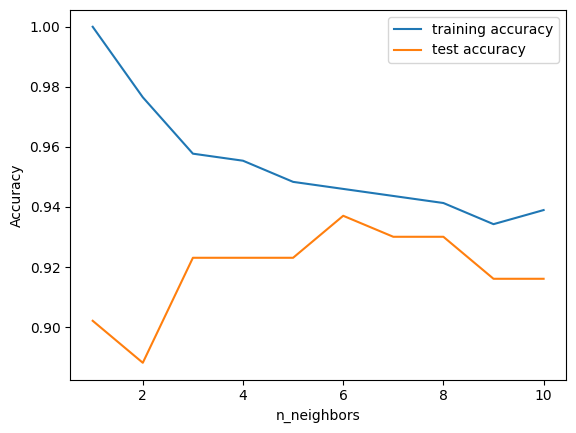

In [50]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

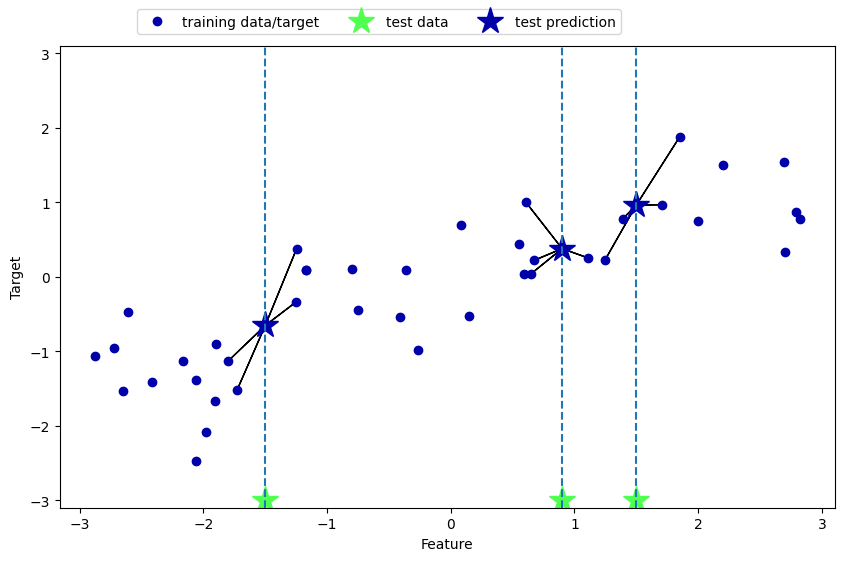

In [51]:
mglearn.plots.plot_knn_regression(n_neighbors=4)

In [52]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近某店を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [53]:
# テストセットに対して予測を行う
print("Test set predictions:\n {}".format(reg.predict(X_test)))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [55]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


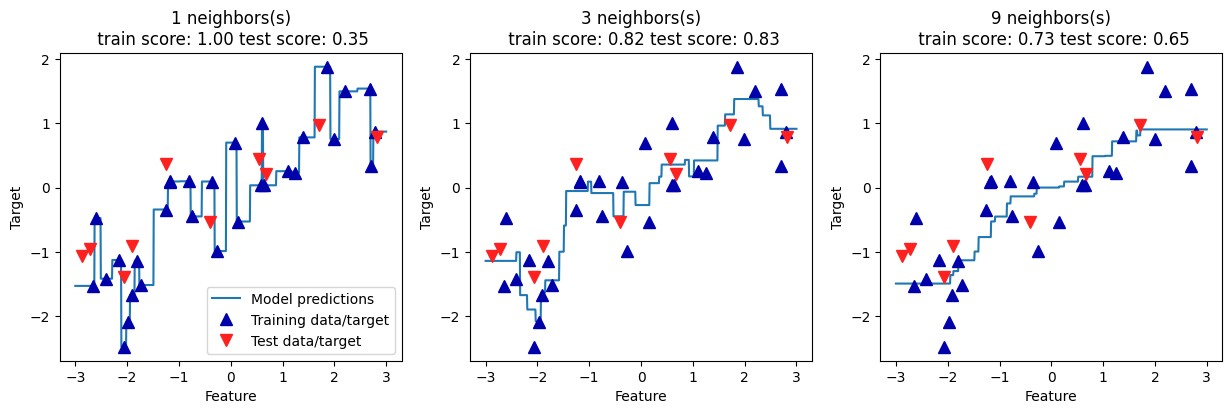

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3から3までの間に1000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

In [ ]:
"""
はい、この画像と説明をより詳しく、初学者にもわかりやすく解説いたします。

1. k近傍法の基本概念：
   k近傍法は、新しいデータポイントの予測を行う際に、最も近い「k個」の訓練データを参考にする手法です。ここでの「k」は考慮する近隣点の数を表します。

2. 画像の構成：
   この画像は3つのグラフから成り、左から順に1近傍、3近傍、9近傍の結果を示しています。青い三角は訓練データ、赤い逆三角はテストデータ、青い線はモデルの予測を表しています。

3. 1近傍（左のグラフ）の特徴：
   - 訓練スコアが1.00と完璧ですが、テストスコアは0.35と低くなっています。
   - 予測線（青線）が訓練データの点を完全に通過しています。
   - これは「過学習」の典型例で、モデルが訓練データを「丸暗記」してしまい、新しいデータに対する汎化性能が低いことを示しています。

4. 3近傍（中央のグラフ）の特徴：
   - 訓練スコア（0.82）とテストスコア（0.83）がバランスよく高くなっています。
   - 予測線がやや滑らかになり、個々のデータポイントの影響が緩和されています。
   - これは適度な「汎化」が行われていることを示唆しています。

5. 9近傍（右のグラフ）の特徴：
   - 訓練スコア（0.73）とテストスコア（0.65）が共に低下しています。
   - 予測線が非常に滑らかになり、個々のデータポイントの影響がさらに小さくなっています。
   - これは「過度な単純化」の兆候で、モデルがデータの細かな特徴を捉えきれていない可能性があります。

6. バイアスとバリアンスのトレードオフ：
   - 1近傍：高バリアンス（データの細かな変動に敏感）、低バイアス（モデルの仮定が少ない）
   - 9近傍：低バリアンス（データの細かな変動に鈍感）、高バイアス（モデルの仮定が多い）
   - 3近傍：この場合、バイアスとバリアンスのバランスが最も良いように見えます。

7. 結論：
   最適なkの値を選ぶことが重要です。小さすぎるkは過学習を、大きすぎるkは単純すぎるモデルを生み出します。理想的なkは、訓練データとテストデータの両方で良好なパフォーマンスを示すものです。

この例は、機械学習モデルの複雑さと汎化能力のバランスを取ることの重要性を視覚的に示しています。実際の応用では、クロスバリデーションなどの手法を用いて最適なkを選択します。
"""